In [81]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt

In [107]:
path = "/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/intelligent_bidding/data/rl_rewards/*.csv"

rewards_list = []
for fname in glob.glob(path):
#     print(fname.split("/")[-1].split("_")[2])
    tmp_reward = pd.read_csv(fname)
    tmp_reward['number_of_plants'] = int(fname.split("/")[-1].split("_")[2])
#     print(tmp_reward)
    rewards_list.append(tmp_reward)
    
reward_df = pd.concat(rewards_list)
reward_df

,Wall time,Step,Value,number_of_plants
0,1.591016e+09,1000,193.458481,216
1,1.591016e+09,2000,192.531113,216
2,1.591017e+09,3000,105.382210,216
3,1.591017e+09,4000,141.725525,216
4,1.591018e+09,5000,167.557220,216
...,...,...,...,...
149,1.591078e+09,150000,91.558487,11
150,1.591079e+09,151000,95.831909,11
151,1.591079e+09,152000,93.090141,11
152,1.591079e+09,153000,91.248718,11


In [83]:
number_of_plants = [14, 25, 155, 164, 213, 216, 11, 11, 130, 9, 49, 3]
plant_names = ["EDF Energy", "EDF Energy_RWE Generation SE",  "EDF Energy_RWE Generation SE_SSE", "EDF Energy_RWE Generation SE_SSE_Uniper UK Limited", "EDF Energy_RWE Generation SE_SSE_Uniper UK Limited_Scottish power", "EDF Energy_RWE Generation SE_SSE_Uniper UK Limited_Scottish power_Drax Power Ltd", 'Orsted', 'RWE Generation SE', 'SSE', 'Uniper UK Limited','Scottish power', 'Drax Power Ltd']
capacity = [14763, 23427, 31817.7, 38422.7, 42894.2, 46929.2, 2738.7, 8664.0, 8390.7, 6605.0, 4471.5, 4035.0]

# 14	14763
# 25	23427
# 155	31817.7
# 164	38422.7
# 213	42894.2
# 216	46929.2

relevant_plant_stats = pd.DataFrame({"number_of_plants": number_of_plants, "plant_names": plant_names, "capacity":capacity})
relevant_plant_stats

,number_of_plants,plant_names,capacity
0,14,EDF Energy,14763.0
1,25,EDF Energy_RWE Generation SE,23427.0
2,155,EDF Energy_RWE Generation SE_SSE,31817.7
3,164,EDF Energy_RWE Generation SE_SSE_Uniper UK Lim...,38422.7
4,213,EDF Energy_RWE Generation SE_SSE_Uniper UK Lim...,42894.2
5,216,EDF Energy_RWE Generation SE_SSE_Uniper UK Lim...,46929.2
6,11,Orsted,2738.7
7,11,RWE Generation SE,8664.0
8,130,SSE,8390.7
9,9,Uniper UK Limited,6605.0


In [109]:
company_stats = pd.read_csv("/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/intelligent_bidding/data/company_list/company_stats.csv")

companies_used_stats = company_stats[pd.DataFrame(company_stats.Company.tolist()).isin(["EDF Energy", "RWE Generation SE", "SSE", "Uniper UK Limited", "Scottish power","Drax Power Ltd","Orsted",'Magnox Ltd']).any(1)]
companies_used_stats 

all_data = pd.merge(reward_df, relevant_plant_stats, on="number_of_plants")
all_data.to_csv("/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/intelligent_bidding/data/results/reward_df.csv")

all_data

,Wall time,Step,Value,number_of_plants,plant_names,capacity
0,1.591016e+09,1000,193.458481,216,EDF Energy_RWE Generation SE_SSE_Uniper UK Lim...,46929.2
1,1.591016e+09,2000,192.531113,216,EDF Energy_RWE Generation SE_SSE_Uniper UK Lim...,46929.2
2,1.591017e+09,3000,105.382210,216,EDF Energy_RWE Generation SE_SSE_Uniper UK Lim...,46929.2
3,1.591017e+09,4000,141.725525,216,EDF Energy_RWE Generation SE_SSE_Uniper UK Lim...,46929.2
4,1.591018e+09,5000,167.557220,216,EDF Energy_RWE Generation SE_SSE_Uniper UK Lim...,46929.2
...,...,...,...,...,...,...
2143,1.591078e+09,149000,70.801819,3,Drax Power Ltd,4035.0
2144,1.591079e+09,150000,70.746803,3,Drax Power Ltd,4035.0
2145,1.591079e+09,151000,72.966759,3,Drax Power Ltd,4035.0
2146,1.591079e+09,152000,71.273895,3,Drax Power Ltd,4035.0


Text(0, 0.5, 'Average £/MWh accepted for companies \nwith RL bidding strategy')

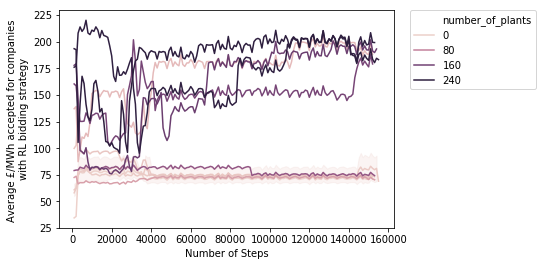

In [85]:
sns.lineplot(data=reward_df, x="Step", y="Value", hue="number_of_plants")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Number of Steps")
plt.ylabel("Average £/MWh accepted for companies \nwith RL bidding strategy")

Text(0, 0.5, 'Mean £/MWh accepted for companies \nwith RL bidding strategy')

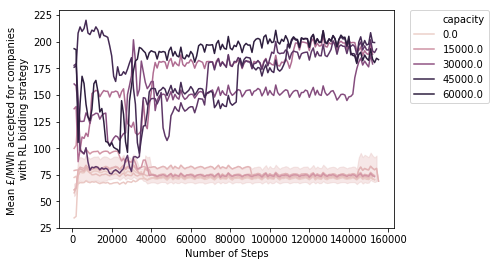

In [86]:
sns.lineplot(data=all_data, x="Step", y="Value", hue="capacity")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Number of Steps")
plt.ylabel("Mean £/MWh accepted for companies \nwith RL bidding strategy")

Text(0, 0.5, 'Average £/MWh accepted for companies \nwith RL bidding strategy')

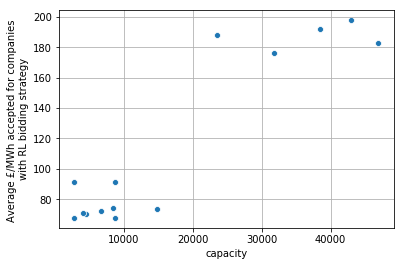

In [118]:
sns.scatterplot(data=all_data[all_data.Step==all_data.Step.max()-5000], x="capacity", y="Value")
plt.grid(b=True, which='major')
plt.ylabel("Average £/MWh accepted for companies \nwith RL bidding strategy")